# **Simulação de Evento de Microlentes Gravitacionais**
* PET - Física
* Petianos: Ylana Karolina Santos Lopes
* Data: 27 de dezembro de 2024

O objetivo desse `notebook` introduzir o tema das microlentes gravitacionais através de uma simulação de um evento com lentes iguais de mesma massa e produzir uma curva de luz artificial da mesma. Ao longo do texto, trataremos da base teórica por trás das microlentes, mas sem adentrar em relatividade geral, de forma que não é necessário conhecimento prévio no assunto. Grande parte do `notebook` é baseado na dissertação de mestrado L. Almeida **[1]**. Com isso, o `notebook` será organizado da seguinte forma:

1. *Introdução*;
2. *Teoria das Microlentes*;
4. *Simulação*;
5. *Conclusão.*

## Importando biblioteca

In [1]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
%load_ext version_information
%version_information matplotlib, numpy

Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
matplotlib 3.8.0
numpy 1.26.4
Wed Jan 15 10:00:56 2025 Hora oficial do Brasil

In [3]:
# Aqui é só uma função para formatar as figuras e o código ficar menos poluído.
def format():
    plt.figure(figsize=(6,6))
    plt.xlabel(r"$x/R_{E}$", family = 'serif')
    plt.ylabel(r"$y/R_{E}$", family = 'serif')
    plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
    return

## **1. Introdução** 

As lentes gravitacionais são uma consequência observável da Relatividade Geral. De forma sucinta, a massa de um objeto curva o espaço-tempo, fazendo com que a luz siga essa curvatura e sofra deflexão. Ou seja, o próprio espaço age como uma lente, desviando a luz de uma fonte original e formando a imagem em um ponto diferente da sua posição real. Existem três tipos de lentes gravitacionais: fortes, fracas e microlentes. Neste trabalho, exploraremos principalmente as microlentes gravitacionais como método de detecção de exoplanetas.

A primeira observação de uma lente gravitacional ocorreu em Sobral, no Ceará, durante o eclipse solar de 1919, confirmando as previsões da Relatividade Geral. Apesar de Albert Einstein inicialmente duvidar que fosse possível observar esse fenômeno diretamente, aqui estamos **[4]**. As microlentes, em particular, diferem dos outros tipos de lentes por não formarem imagens nítidas na resolução típica dos telescópios. Em vez disso, observa-se uma magnificação da luz que chega ao observador durante o evento. Os fenômenos de microlentes acontecem tanto em larga escala, envolvendo galáxias e quasares, quanto em escalas estelares, usados principalmente para detectar exoplanetas.

Por si só, o método das microlentes é relativamente ineficiente para detectar exoplanetas. Além da dificuldade de prever um evento, é necessária uma monitoração cuidadosa ao longo de todo o fenômeno, exigindo cooperação internacional para reunir pontos fotométricos suficientes para identificar a possível existência de um planeta. No entanto, o que motiva os pesquisadores a persistirem nessa técnica é sua independência em relação à estrela do sistema planetário que está sendo analisado. Essa independência é essencial para obtermos uma amostra da demografia planetária com menos *bias observacionais* (favorecimento causado pelo método de observação) **[3]**. Como discutiremos mais adiante, o sistema planetário funciona como um sistema de duas lentes, e, portanto, o que indica sua existência é a própria curvatura do espaço-tempo, não a luz da estrela orbitada pelo alvo. Assim, a maior barreira que enfrentamos são os próprios instrumentos, que apresentam uma razão Sinal/Ruído (SNR) baixa, o que pode dificultar a detecção de planetas menores que a Terra.

## **2. Teoria das microlentes**

Agora nós iremos nos aprofundar um pouco mais na teoria que rege esses fenômenos. Um evento de microlentes acontece quando um objeto compacto - no nosso caso uma estrela - passa em frente a uma fonte luminosa mais distante, fazendo com que a luz da fonte seja desviada devido à curvatura do espaço-tempo causada pelo objeto compacto. Esse desvio acarreta um aumento temporário da luminosidade da estrela fonte, observado como uma magnificação nas curvas de luz. Este efeito de amplificação só é possível de ser observado quando há um alinhamento (quase perfeito) entre o observador, o objeto massivo e a estrela fonte. O que se torna um dos motivos que tornam este tipo de evento raro.
O esquema de como o evento acontece pode ser visualizado na figura (1) abaixo:


![diagrama](figures/diagrama.png)

Figura 1: Geometria de um caso geral de microlentes gravitacionais. Figura do livro *Methods of Detecting Exoplanets* **[3]**

Em que Source, Lens e Observer determinam a posição da estrela fonte, da que se comporta como lente e do observado. 
Tendo essas ideias em mente, ao tratar da detecção de planeta estaremos tratando de um sistema de lentes binárias. Ou seja, em vez da luz sofrer deflexão apenas causada pela curvatura do espaço-tempo da estrela lente, também sofrerá uma deflexão a mais condizente a curvatura do planeta orbitando nossa lente original. Ao analisarmos a curva de luz resultante, observamos que há um pequeno pico dentro da curva principal. Esse pico é o que chamamos de deflexão planetária, sendo nosso indicativo da presença de um exoplaneta. 


![lk](figures/light_curve.jpg)

Figura 2: Curva de luz de um evento de microlentes com a presença de uma pertubação entre 3592 e 3593 JD, marcada como *planetary deviation* que indica a presença de um exoplaneta. Cada cor corresponde a um observatório diferente que coletou os dados. Figura da *ESO*.

### **2.1 Fundamentos das microlentes**

Com base na Teoria da Relatividade Geral, surgem alguns conceitos fundamentais para a teoria das microlentes: o ângulo de deflexão da luz ($ \Delta \varphi $) e o raio de Schwarzschild ($R_{S}$). O ângulo de deflexão da luz foi uma previsão confirmada por Eddington durante o eclipse de 1919, observado por ele na Ilha do Príncipe, na costa da África. A equação (1) apresenta a expressão que descreve esse ângulo, em que $ M $ e $ R $ representam a massa e o raio da estrela que atua como lente. 

Por outro lado, o raio de Schwarzschild é a distância do centro de um buraco negro até o seu horizonte de eventos, ponto além do qual nem a luz consegue escapar. A expressão (2) mostra que o  $R_{S}$ depende apenas da massa do objeto massivo, sendo $ c $ a velocidade da luz e $ G $ a constante gravitacional universal.

 
\begin{equation}
\Delta \varphi = \frac{4GM}{c^2 R}, \tag{1 e 2} \quad \quad R_S = \frac{2GM}{c^2}. 
\end{equation}

O raio de Schwarzschild é importante por podermos descrever campos gravitacionais em função dele. Assim, quando consideramos uma fonte distante passando na linha de visada do observador, usando a equação (1) podemos encontrar o ângulo de deflexão da luz como sendo $\alpha$, em função de $R_{s}$:

\begin{equation}
\alpha = \frac{2R_S}{r_E} \tag{3}
\end{equation}

Em que o $R$ da equação (1) se transforma no chamado raio de Einstein $r_{E}$ e condiz com o raio do anel de Einstein quando há alinhamento perfeito (local em que vemos formar a imagem no caso de lentes gravitacionais fortes). Caso a Figura 1 fosse uma geometria perfeitamente alinhada, o $r_{E}$ seria denotado pelo $b$. 

Quando estamos tratando de eventos de microlentes, é importante ressaltar que os ângulos tratados são bem pequenos de forma que podemos fazer a aproximação de $tan (\theta) \approx \theta$. Com isto em mente, podemos brincar um pouco com a geometria do problema, usando apenas trigonometria básica. Analisando o diagrama da Figura 1, vemos que podemos reescrever $\alpha = \varphi + \theta_{I}$ , em que $\varphi$ é o ângulo dado pelo triangulo retângulo originado da partição do angulo $\alpha$. De forma que podemos escrevê-lo como:    

\begin{equation}
\varphi = \frac{ b - \theta_{s} D_S}{D_S - D_L}.  \tag{4}
\end{equation}

Vendo que $\theta_{I}$ pode ser reescrito como $\theta_{I} = b/D_{L}$, substituímos na expressão que descreve $\alpha$ como a soma de dois ângulos para encontrarmos

\begin{equation}
\alpha =  \frac{b} {D_L} + \frac{b - \theta_{s} D_S}{D_S - D_L}. \tag{5}
\end{equation}

Igualando a equação (5) a equação (3), e isolando o $\theta_{s}$ de forma que encontramos uma expressão geral para o caso geral das microlentes:

\begin{equation}
\theta_{s} = \theta_{I}  - \frac{2R_{s}}{D_{s}D_{L}\theta_{I}} (D_{S} - D_{L}). \tag{6}
\end{equation}


Fazendo uma manipulção análoga para o caso perfeitamente alinhado, encontramos que o raio (angular) de Einstein $\theta_{E}^2 = 2R_{s}(D_s - D_L)/(D_L D_s)$. Dessa forma, podemos reescrever a equação (6) em função do raio de Einstein de forma que encontramos a equação que ficou conhecida como equação da lente. 


\begin{equation}
\theta_{s} = \theta_{I} - \frac{\theta _{E}^2}{\theta_{I} } \tag{7}
\end{equation}

Com ela, somos capazes de determinar a posição da fonte quando temos os locais das imagens.

## **3. Simulação**

O objetivo central desse `notebook` é a criação de uma curva de luz artificial de uma simulação de um evento de microlentes gravitacionais. Para isso vamos simular um conjunto de pontos que serão nossos fótons, e os passaremos pela função que nos retornará uma figura de como o trajeto desses fótons é alterado pela presença das lentes. Trataremos de um sistema binário com lentes de massas iguais e a mesma distância da origem.

### **3.1 Inverse Ray Shooting**

Com o aumento no número de lentes em um sistema, as soluções analíticas para a equação se tornam cada vez mais complexas. Para dar uma ideia, em um sistema com 3 lentes (estrela - planeta - lua, por exemplo), precisaríamos resolver um polinômio de grau 10 o que se torna inviável. Existem métodos semi-analíticos que lidam melhor com esse tipo de problema, mas aqui utilizaremos o *Inverse Ray Shooting*. Com esse método, basicamente simulamos o caminho da luz no sentido inverso: saindo do observador em direção a lente, para assim vermos se o fóton chega na fonte. A equação (8) abaixo é uma generalização da equação que descreve $\alpha$, tornando possível aplicar a deflexão para $n$ lentes:

$$
\mathbf{z}_f = \mathbf{z}_i - \sum_{j=1}^{n} \frac{\epsilon_j} {| \mathbf{z}_i - \mathbf{r}_j|^2} (\mathbf{z}_i - \mathbf{r}_j). \tag{8}
$$

Em que o vetor $\mathbf{z}_i$ corresponde a posição inicial do ponto (fóton), enquanto $\mathbf{z}_f$ é a posição após sofrer a deflexão. Já os termos  $\epsilon_j$ e $\mathbf{r}_j $ correspondem,  respectivamente, à fração de massa entre as lentes e à posição delas em relação à origem, expressa em unidades de raio de Einstein ($r_E$).

Dessa forma, podemos começar a implementar alguns conceitos. Inicialmente vamos criar uma classe `Body`, que definirá os objetos com os quais trabalharemos.  Conforme observado na equação (8), é necessário conhecer a fração da massa em relação ao sistema total de lentes e a sua posição, assim procederemos para implementá-los.


In [4]:
class Body:
    def __init__(self, massa_frac, position):
        self.massa_frac = massa_frac
        self.position = np.array(position, dtype='float64')

Em seguida definimos a função `cart`, que implementa a equação (8) que por sua vez generaliza a expressão da deflexão da luz para o plano cartesiano. Para isso, expandimos o somatório para duas lentes e definimos as variáveis que serão usadas. É possível criar uma função geral para esse somatório em que só precisamos indicar o numéro $n$ de lentes, contudo, como o número é baixo, resolvemos expandir manualmente mesmo.

In [5]:
def cart(zix, ziy, body1, body2):
    e1 = body1.massa_frac     #=> fração da massa 
    r1x = body1.position[0]   #=> posição da lente 1 em relação a origem (coordenada x)
    r1y = body1.position[1]   #=> posição da lente 1 em relação a origem (coordenada y)
    e2 = body2.massa_frac     #=> fração da massa 
    r2x = body2.position[0]   #=> posição da lente 2 em relação a origem (coordenada x)
    r2y = body2.position[1]   #=> posição da lente 2 em relação a origem (coordenada y)


    zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
    zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)
    return zfx, zfy

### **3.2 Distribuição de Vogel**

No trabalho **[1]** que este `notebook` adotou como base, o autor testa diversos tipos de distribuição de pontos para ter como conjunto de pontos iniciais. As distribuições randômicas e uniformes funcionaram bem, mas apresentaram ruído demais ou padrões de interferência que afetavam a curva de luz final. Com isso em mente, o autor se baseou em um artigo de 1978, em que H. Vogel estuda o padrão das sementes de um girassol **[2]**, percebendo que cada semente do miolo da flor (na verdade, flores pequenas) se organizam fazendo um ângulo de 137,5° com a seguinte em relação ao centro. Formando o famoso ângulo áureo. Aos interessados em uma discussão mais detalhada, o artigo original de 1978 é uma ótima leitura. 

Assim, como essa foi a distribuição escolhida como a melhor por Almeida, vamos adotar ela neste trabalho também. Vamos definir o ângulo de ouro em radianos como:

$$ \theta_\varphi = \pi (3 - \sqrt{5}).$$

E usar as coordenadas $x$ e $y$ em coordenadas polares:

$$ x = r cos(\theta), \quad y = r sen(\theta).$$

De forma que podemos implementar essa distribuição como a função `vogel`, que nos retornará as coordenadas da quantidade de pontos que quisermos obedecendo essa distribuição.



In [6]:
def vogel(num_points):
    
    golden_angle = np.pi * (3 - np.sqrt(5))
    
    theta = golden_angle * np.arange(num_points)
    
    r = np.sqrt(theta)
    
    x = r * np.cos(theta)/(num_points/1000) # A divisão por 1000 é por questão de escala
    y = r * np.sin(theta)/(num_points/1000)

    return x, y

Aqui podemos visualizar como é a distribuição original de pontos obedecendo o método que é mencionado no artigo de Vogel sobre girassóis.

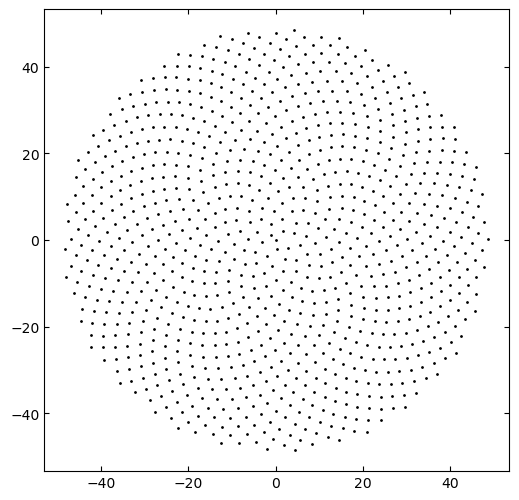

In [7]:
x, y = vogel(1000)

plt.figure(figsize=(6,6))
plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.scatter(x,y, s = 1, c = 'black')

### **3.3 Mapa de magnificação**
Nesta seção, vamos construir o mapa de magnificação. O objetivo desta figura é ilustrar como o campo gravitacional das lentes curva a luz proveniente de uma fonte distante. Em nosso estudo, consideramos um plano com uma distribuição de pontos que representam os fótons do sistema. Ao passarem pela equação que descreve o desvio das trajetórias dos fótons, eles se reorganizam, formando um envelope de luz — a cáustica.

Inicialmente vamos definir dois corpos que serão os que irão agir como as lentes. Já que queremos dois corpos iguais para melhorar a visualização, a $\epsilon = 0,5$ e os localizaremos a uma distância de $0,75$ $ r_E$ da origem no eixo $x$.  

In [8]:
corpo_1 = Body(0.5, [-0.75, 0])
corpo_2 = Body(0.5, [0.75, 0])

Tendo os corpos definidos, podemos escolher um número de pontos para iniciar nosso processo. Primeiro geramos a distribuição de pontos seguindo o método de Vogel, ou espirais de Vogel, e passamos as coordenadas pela função `cart` que nos retornará as coordenadas finais dos fótons após a deflexão. Ao plotarmos a figura já é possível observar a concentração de pontos formando a cáustica no centro da imagem.

(-2.0, 2.0)

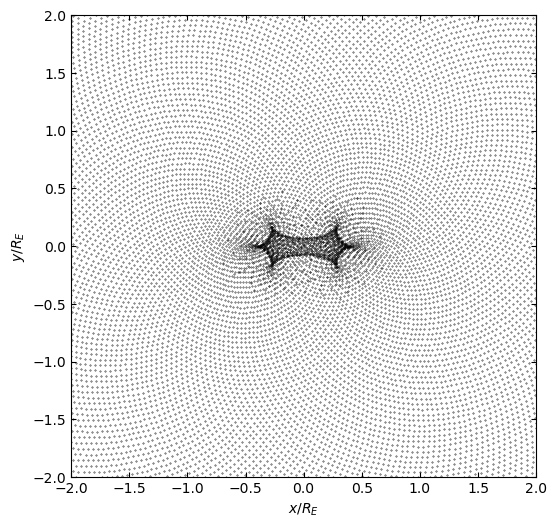

In [9]:
zix, ziy = vogel(50000)
x1, y1 = cart(zix, ziy, corpo_1, corpo_2)


format()
plt.scatter(x1, y1, s = 0.1, c = 'black')
plt.xlim(-2,2)
plt.ylim(-2,2)

A figura anterior já nos proporciona uma ideia da forma do mapa final. No entanto, para obtermos de fato o mapa de magnificação, utilizaremos a função `hist2d` do pacote `matplotlib`, que gera um mapa de densidade de pontos. Como o código desenvolvido para este trabalho não é dos mais otimizados, é necessário usar um número maior de pontos para alcançar uma resolução adequada no mapa. A função `hist2d` cria um histograma em cada eixo da figura, formando uma grade, e contabiliza os pontos dentro de cada célula da grade para calcular o mapa de densidade, que é exatamente o que buscamos.

In [10]:
zix, ziy = vogel(500000)
x1, y1 = cart(zix, ziy, corpo_1, corpo_2)

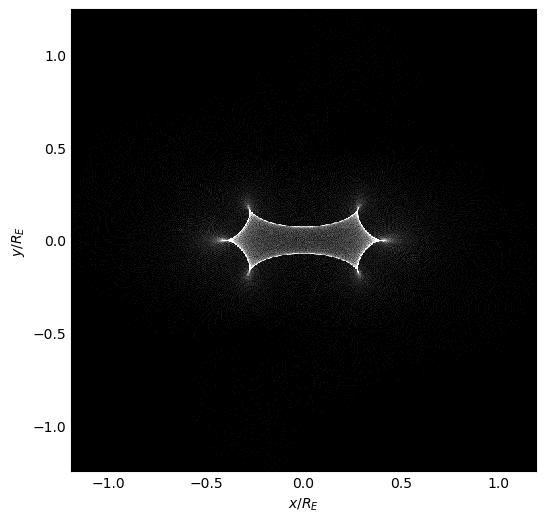

In [11]:
format()
plt.hist2d(x1, y1, bins = 700,  cmap ="binary_r", vmin=1, vmax = 20)
plt.show()



### **3.4 Curva de luz artificial**

Já para gerar a curva de luz, precisamos definir um trajeto cruzando a cáustica que é análogo ao movimento relativo entre o observador e as lentes. Assim, partimos da equação da reta com intuito de termos uma série de pontos que serão essenciais na formação da nossa série temporal.

\begin{equation}
    y = m x + b. \tag{9}
\end{equation}

Em que $m = tan(\alpha)$ é nosso coeficiente angular, e $b$ o coeficiente linear. Ambos os valores são de escolha arbitrária, podendo ser modificados para ver o impacto na curva de luz final.



In [14]:
passo = 300
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b

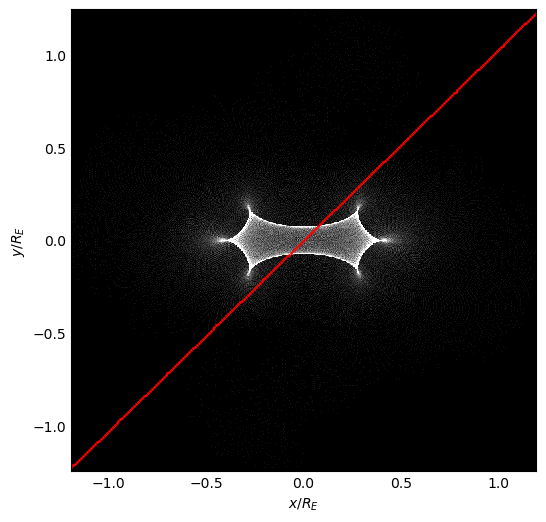

In [15]:
format()
plt.hist2d(x1, y1, bins = 700,  cmap ="binary_r", vmin=1, vmax=14)
plt.scatter(xp, yp, s = 1, c = 'red')

Assim, para construírmos a curva de luz precisamos saber a contagem de fótons em cada ponto do trajeto de pontos vermelhos, que condiz com as medições fotométricas de um evento ao longo do tempo. Para isso faremos o mesmo esquema que a função `hist2d`, mas explicitamente: criaremos um grid (grade) na figura e contabilizaremos o número de fótons dentro de cada quadradinho em que tiver um ponto vermelho. Essa contagem vai representar a magnifcação temporária da luz da fonte quando plotarmos.

Neste bloco abaixo formaremos o grid.

In [16]:
grid_size = 0.01   
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(x1, y1, bins=[x_edges, y_edges])

bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]

E aqui calculamos a densidade em cada quadrado que contém por um ponto vermlho.

In [17]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1                   # Determina o Bin em cada ponto
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]                      # Pega o número de fótons no Bin

    density_1 = num_points_in_bin / (bin_width * bin_height)    # Calcula a densidade no ponto escolhido
    density.append(density_1)                                   # Armazena o valor da densidade

Assim, podemos plotar a curva de luz.

Text(0.5, 0, 'Time')

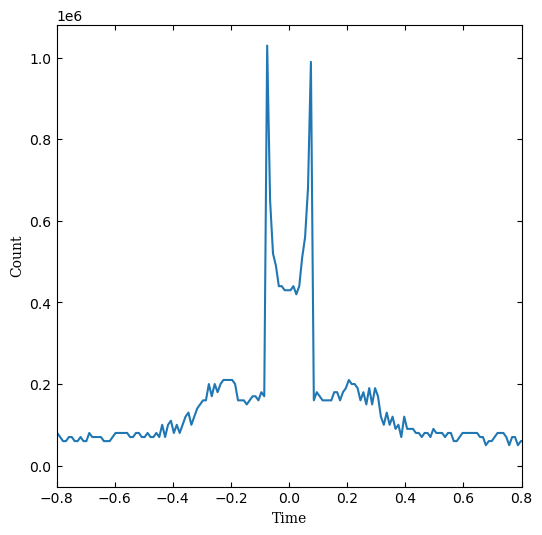

In [18]:
format()
plt.plot(xp, density)
plt.ylabel("Count")
plt.xlim(-.80, .80)
plt.xlabel("Time")

Com tudo em mãos, fomos capazes de plotar a curva de luz e ver que ela condiz com o esperado do trabalho base **[1]**. Ela apresenta os dois picos quase simétricos, como era previsto por se tratar de lentes de mesma massa e um trajeto cruzando a cáustica perto do centro. Porém, é possível perceber que há um certo ruído derivado da forma que o código foi construído, o que não é ideal. 

Para resolver esse problema, utilizaremos o algoritmo de média móvel (*moving average*), cuja função é suavizar a curva. Primeiramente, definimos um valor para o tamanho da janela (`window_size`), que determina o peso (`kernel`) aplicado para calcular a média ponderada dos valores ao redor de um ponto, levando em consideração o valor da janela.

In [22]:
window_size = 2
kernel = np.ones(window_size) / window_size  # Cria um vetor do tamanho da janela composto de 1, e divide pela janela

density_smooth = np.convolve(density, kernel, mode='same') # Aplica o peso aos números rodeando cada ponto dos "dados" ruidosos

Por fim, conseguimos uma curva de luz, com ruído reduzido, de um evento de microlentes gravitacionais para um sistema de lentes binário de massas iguais.

Text(0.5, 0, 'Time')

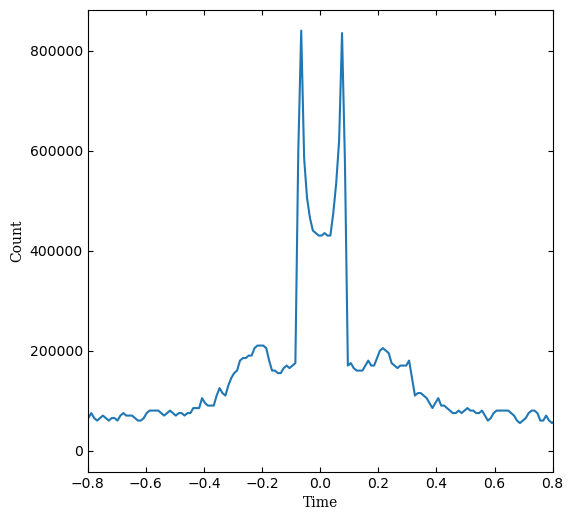

In [23]:
format()
plt.plot(xp, density_smooth)
plt.ylabel("Count")
plt.xlim(-.80, .80)
plt.xlabel("Time")

## **4. Conclusão**


A técnica de microlentes gravitacionais, embora não contribua de maneira significativa para o aumento anual do número de descobertas de exoplanetas, tem um papel crucial na ampliação do nosso conhecimento sobre a verdadeira população de planetas que orbitam as estrelas que observamos. Esse método proporciona uma perspectiva com menos viés observacional, permitindo a detecção de uma nova parte da demografia planetária que ainda não foi explorada a fundo.

O código desenvolvido para este `notebook` ainda apresenta grande espaço para otimização em comparação com o trabalho original **[1]**, mas conseguiu atingir seu objetivo inicial: gerar uma curva de luz artificial de um sistema binário de lentes.

## **Referências**

[1] Almeida, L., 2017. Estudo da topologia de microlentes gravitacionais e a descoberta de exoplanetas do tipo Terra na zona habitável. 

[2] Vogel, H., 1978. A better way to construct the sunflower head. Mathematical Biosciences, 44(3):179 - 189.

[3] Mancini, L.,Bozza, V., Sozzetti, A., 2016.  Methods of Detecting Exoplanets: 1st Advanced School on Exoplanetary Science.

[4] Perryman, M, 2018. The Exoplanet Handbook.
